In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df = pd.read_csv('Melbourne_housing.csv',usecols=['Latitude', 'Longtitude',
        'Propertycount', 'Price'])

In [3]:
df

,Latitude,Longtitude,Propertycount,Price
0,-37.80140,144.99580,4019.0,NaN
1,-37.71800,144.87800,3464.0,840000.0
2,-37.84590,144.95550,3280.0,1275000.0
3,-37.84500,144.95380,3280.0,1455000.0
4,-37.78180,145.01980,2211.0,NaN
...,...,...,...,...
34852,-37.69769,145.02332,21650.0,475000.0
34853,-37.63665,144.92976,5833.0,591000.0
34854,-37.97037,145.15449,4054.0,NaN
34855,-37.97751,145.14813,4054.0,780500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Latitude       26881 non-null  float64
 1   Longtitude     26881 non-null  float64
 2   Propertycount  34854 non-null  float64
 3   Price          27247 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [5]:
df.fillna(df.mean(),inplace=True)

In [6]:
df.isnull().mean()

Latitude         0.0
Longtitude       0.0
Propertycount    0.0
Price            0.0
dtype: float64

<Axes: xlabel='Propertycount', ylabel='Count'>

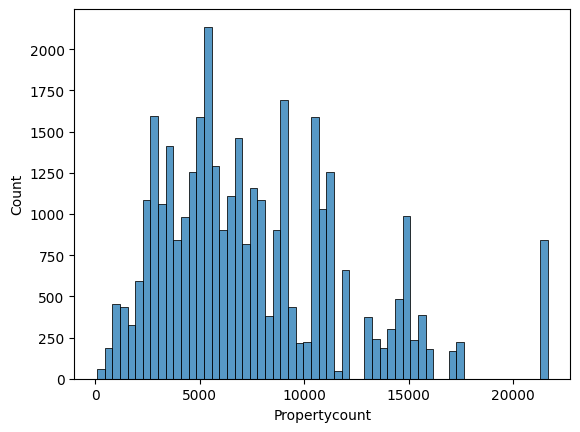

In [7]:
sns.histplot(df.Propertycount)

In [8]:
from sklearn.preprocessing import KBinsDiscretizer

In [9]:
kbd = KBinsDiscretizer(strategy='uniform',n_bins=10,encode='ordinal')

In [10]:
df['PropertycountBinned'] = kbd.fit_transform(df[['Propertycount']])

<Axes: xlabel='PropertycountBinned', ylabel='Count'>

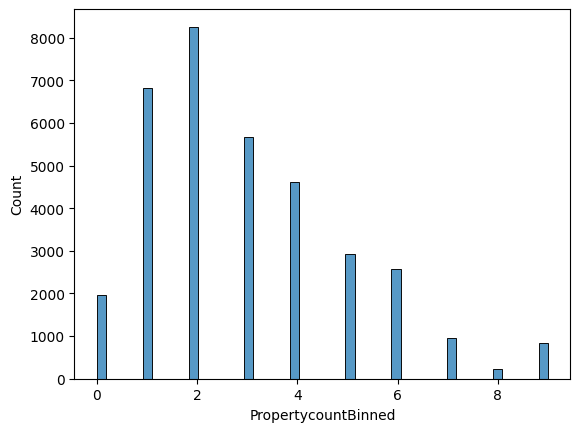

In [11]:
sns.histplot(df.PropertycountBinned)